# Base de Datos Relacional para Agroquímicos
Las tablas con las que se trabajan en el siguiente caso pertenecen a datos registrados en una empresa de agroquímicos, propongo un modelo de base de datos relacional, compuesto por dos tablas principales: **Productos y InventarioAlmacen**. Estas tablas nos permitirán gestionar el catálogo completo de productos agroquímicos, controlar los niveles de inventario en diferentes almacenes, identificar productos que necesitan reabastecimiento, analizar rotación de inventario, realizar análisis de costos y valoración de inventario

**1. Generación de una base de datos relacional que contenga a dichas tablas y la explicación de su aplicación, indicando el significado de cada unos de los campos que las componen.**

## Tabla de Inventario Almacén
Esta tabla se compone de los siguientes registros (se anexa una pequeña explicación):
-  RegistroID: Identificador único del registro de inventario
-  ProductoID: Clave foránea que referencia a la tabla Productos
-  AlmacenID: Identificador del almacén donde está ubicado
-  Cantidad: Cantidad actual en stocken
-  FechaUltimaEntrada: Última fecha de recepción
-  FechaUltimaSalida: Última fecha de despacho
-  NivelReorden: Punto de reorden para gestión de inventario

In [1]:
# Importamos las librerias para trabajar con SQLite - Hacemos la conexión
import sqlite3
import os
import csv
conn = sqlite3.connect("Agroquimicos.db")
cur = conn.cursor() # Definimos la variable cur
# Lectura del archivo 1
os.chdir("/Users/Karin")
with open("Inventario.csv") as f:
    reader = csv.reader(f)
    data = list(reader)
# Creación de la tabla para importar datos
cur.execute("""CREATE TABLE IF NOT EXISTs InventarioAlmacen(
                RegistroID INT PRIMARY KEY,
                ProductoID INT NOT NULL,
                AlmacenID INT NOT NULL,  -- Identificador del almacén
                Cantidad DECIMAL(10,2) NOT NULL,
                FechaUltimaEntrada DATE,
                FechaUltimaSalida DATE,
                NivelReorden INT NOT NULL);
""")
# Inseratamos los datos en la tabla
for renglon in range(1, len(data)):
    cur.execute('''
        INSERT INTO InventarioAlmacen(RegistroID, ProductoID, AlmacenID, Cantidad, FechaUltimaEntrada, FechaUltimaSalida, NivelReorden)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        ''', data[renglon])
conn.commit()

In [3]:
data

[['RegistroID',
  'ProductoID',
  'AlmacenID',
  'Cantidad',
  'FechaUltimaEntrada',
  'FechaUltimaSalida',
  'NivelReorden'],
 ['1', '58', '42', '2612', '2024-12-27', '2025-06-01', '6998'],
 ['2', '42', '49', '9590', '2025-02-10', '2024-07-18', '3262'],
 ['3', '28', '91', '4039', '2024-12-08', '2024-08-01', '446'],
 ['4', '60', '48', '4691', '2025-04-25', '2025-05-14', '5855'],
 ['5', '79', '27', '3722', '2024-07-30', '2025-03-25', '3799'],
 ['6', '71', '99', '2544', '2025-04-29', '2025-03-23', '6722'],
 ['7', '64', '60', '8989', '2025-03-30', '2025-05-21', '4466'],
 ['8', '88', '30', '8881', '2024-09-12', '2024-10-17', '3482'],
 ['9', '81', '50', '2993', '2025-04-03', '2025-03-20', '9792'],
 ['10', '34', '23', '4140', '2024-08-04', '2025-02-09', '5853'],
 ['11', '20', '96', '1187', '2025-05-10', '2024-08-13', '5115'],
 ['12', '23', '58', '9258', '2025-04-29', '2024-09-25', '2808'],
 ['13', '70', '24', '3629', '2025-06-03', '2025-05-01', '8988'],
 ['14', '78', '54', '8219', '2025-02-1

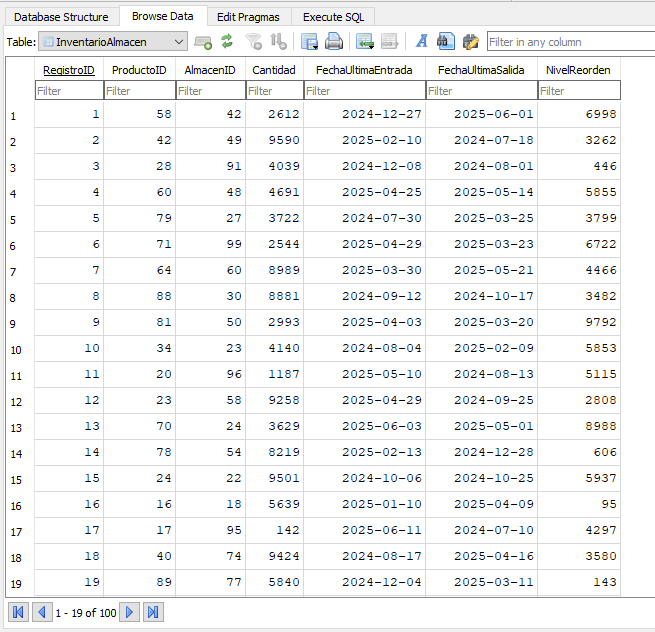

## Tabla de producto
Esta tabla se compone de los siguientes registros (se anexa una pequeña explicación):
- ProductoID: Identificador único del producto (clave primaria)
- Nombre: Nombre comercial del producto agroquímico
- Tipo: Categoría del producto (Herbicida, Insecticida, etc.)
- Formulacion: Forma física del producto
- UnidadMedida: Unidad en que se mide el producto
- PrecioUnitario: Precio por unidad del producto
- FechaRegistro: Cuando se añadió el producto al catálogo
- Activo: Si el producto está disponible para venta (1) o no (0)

In [7]:
# Lectura del archivo 2
os.chdir("/Users/Karin")
with open("producto.csv") as f:
    reader = csv.reader(f)
    data = list(reader)
# Creación de la tabla para importar datos
cur.execute("""CREATE TABLE IF NOT EXISTs Productos(
                ProductoID INT PRIMARY KEY,
                Nombre VARCHAR(100) NOT NULL,
                Tipo VARCHAR(50) NOT NULL, 
                Formulacion VARCHAR(50),   
                UnidadMedida VARCHAR(20) NOT NULL,
                PrecioUnitario DECIMAL(10,2) NOT NULL,
                FechaRegistro DATE NOT NULL,
                Activo BIT DEFAULT 1);
""")
# Inseratamos los datos en la tabla
for renglon in range(1, len(data)):
    cur.execute('''
        INSERT INTO Productos(ProductoID, Nombre, Tipo, Formulacion, UnidadMedida, PrecioUnitario, FechaRegistro, Activo)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', data[renglon])
conn.commit()

In [9]:
data

[['ProductoID',
  'Nombre',
  'Tipo',
  'Formulacion',
  'UnidadMedida',
  'PrecioUnitario',
  'FechaRegistro',
  'Activo'],
 ['1',
  "Kids' Art Easel",
  'Herbicida',
  'Non est omnino hic docendi locus; sed ita sentio et saepe etiam legum iudiciorumque poenis obligantu',
  'oz',
  '58.99',
  '2025-02-04',
  '1'],
 ['2',
  'Sweet Chili Sauce',
  'Insecticida',
  'Dolore. Omnis autem privatione doloris putat Epicurus terminari summam voluptatem, ut ea maior sit, ',
  'kg',
  '2.99',
  '2024-06-15',
  '0'],
 ['3',
  "Children's Art Set",
  'Insecticida',
  'Habeat sapiens, quod gaudeat, quam quod angatur. Optime vero Epicurus, quod exiguam dixit fortunam i',
  'L',
  '34.99',
  '2024-06-20',
  '0'],
 ['4',
  'Compact Digital Camera',
  'Herbicida',
  'Solum incommoda, quae eveniunt inprobis, fugiendam inprobitatem putamus, sed multo etiam magis, quod',
  'g',
  '249.99',
  '2025-03-15',
  '1'],
 ['5',
  'Outdoor Portable Fire Pit',
  'Insecticida',
  'Atomorum et magnitudinem solis prob

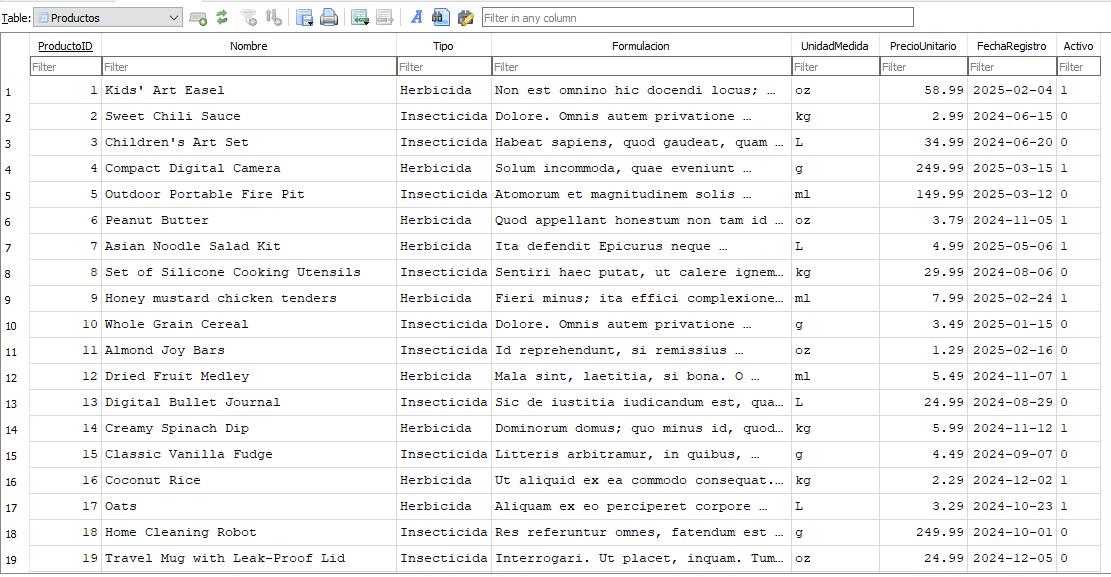

**2. Ejemplos de consulta  ”INNER JOIN” y ”LEFT JOIN”**

In [23]:
# INNER JOIN
cur.execute("""SELECT Productos.Nombre, InventarioAlmacen.Cantidad
            FROM InventarioAlmacen
            INNER JOIN Productos 
            ON InventarioAlmacen.ProductoID = Productos.ProductoID;""")
result = cur.fetchall()
# # Importo la biblioteca de tabulación para que sean más claros los resultados
from tabulate import tabulate
# Nombro los encabezados y mando a impmrimir la tabulación con los encabezados
headers = ["Nombre", "Cantidad"]
print(tabulate(result, headers, tablefmt="GRID"))

Nombre                                  Cantidad
------------------------------------  ----------
Wooden Children's Play Kitchen              2612
Quinoa and Kale Salad Kit                   9590
Magic Color-Changing Mug                    4039
Sliced Turkey Breast                        4691
Maxi Wrap Dress                             3722
Chocolate Mint Cookies                      2544
Sports Windbreaker                          8989
Fresh Basil Pesto                           8881
Compressible Packing Cubes                  2993
Adjustable Garden Rake                      4140
Sweet Corn Fritters                         1187
Coconut Curry Sauce                         9258
Smart LED Desk Lamp                         3629
Reflective Safety Vest                      8219
Honey Butter Popcorn                        9501
Coconut Rice                                5639
Oats                                         142
Cacao Nibs                                  9424
Portable Bluetooth H

En la consulta **INNER JOIN** dimos iunstrucciones para obtener el nombre y cantidad en inventario de todos los productos que tienen registros en el inventario, como resultado nos muestra una consulta donde vemos solo los productos que tienen al menos un registro en la tabla de inventario, entonces si un producto no está en inventario, no aparecerá en el resultado, esto nos es útil para obtener información únicamente de productos activos en almacén

In [25]:
# LEFT JOIN
cur.execute("""SELECT i.RegistroID, i.ProductoID, p.Nombre, i.Cantidad, i.AlmacenID
                FROM InventarioAlmacen i
                LEFT JOIN Productos p 
                ON i.ProductoID = p.ProductoID
                ORDER BY i.RegistroID;""")
result = cur.fetchall()

# Nombro los encabezados y mando a impmrimir la tabulación con los encabezados
headers = ["RegistroID", "ProductoID", "Nombre", "Cantidad", "AlmacenID"]
print(tabulate(result, headers, tablefmt="GRID"))

  RegistroID    ProductoID  Nombre                                  Cantidad    AlmacenID
------------  ------------  ------------------------------------  ----------  -----------
           1            58  Wooden Children's Play Kitchen              2612           42
           2            42  Quinoa and Kale Salad Kit                   9590           49
           3            28  Magic Color-Changing Mug                    4039           91
           4            60  Sliced Turkey Breast                        4691           48
           5            79  Maxi Wrap Dress                             3722           27
           6            71  Chocolate Mint Cookies                      2544           99
           7            64  Sports Windbreaker                          8989           60
           8            88  Fresh Basil Pesto                           8881           30
           9            81  Compressible Packing Cubes                  2993           50
          

La consulta **LEFT JOIN** nos permite obtener todos los registros de inventario, incluso si no tienen  un producto correspondiente en la tabla Productos en este caso no nos mostrará valores nulos, debido a que cuando generamos los valores este campo tomo valores del 1 al 100ad).

**3. Consulta de CASE WHEN y solución de una problematica**

In [39]:
# CASE WHEN
cur.execute("""
SELECT
    RegistroID,
    ProductoID,
    Cantidad,
    NivelReorden,
    CASE
        WHEN Cantidad < NivelReorden THEN "Reabastecer"
        ELSE "Suficiente"
    END AS EstadoInventario
FROM
    InventarioAlmacen
ORDER BY
    EstadoInventario
""")
result = cur.fetchall()
# Nombro los encabezados y mando a imprimir la tabulación con los encabezados
headers = ["RegistroID", "ProductoID", "Cantidad", "NivelReorden", "EstadoInventario"]
print(tabulate(result, headers, tablefmt="GRID"))

  RegistroID    ProductoID    Cantidad    NivelReorden  EstadoInventario
------------  ------------  ----------  --------------  ------------------
           1            58        2612            6998  Reabastecer
           4            60        4691            5855  Reabastecer
           5            79        3722            3799  Reabastecer
           6            71        2544            6722  Reabastecer
           9            81        2993            9792  Reabastecer
          10            34        4140            5853  Reabastecer
          11            20        1187            5115  Reabastecer
          13            70        3629            8988  Reabastecer
          17            17         142            4297  Reabastecer
          20            46        5549            6513  Reabastecer
          23            67          39             869  Reabastecer
          24            19        2215            6322  Reabastecer
          25            50        11

**Problema:** Necesitamos identificar si la cantidad de un producto en inventario está por debajo del nivel de reorden y etiquetarlo como "Reabastecer" o "Suficiente", **CASE WHEN**  nos permitirá clasificar dinámicamente el estado del inventario. Si la cantidad es menor al nivel de reorden, se marca como "Reabastecer", de lo contrario, como "Suficiente", Esto ayuda a priorizar productos para reposición automática.

**4. 3 ejemplos de consultas con SubQueries**

In [45]:
# SubQuery (Semi-Join)
cur.execute("""
 SELECT p.ProductoID, p.Nombre, p.Tipo
 FROM Productos p
 WHERE EXISTS (
        SELECT 1 
        FROM InventarioAlmacen i 
        WHERE i.ProductoID = p.ProductoID
);
""")
result = cur.fetchall()

# Nombro los encabezados y mando a imprimir la tabulación con los encabezados
headers = ["ProductoID", "Nombre", "Tipo"]
print(tabulate(result, headers, tablefmt="GRID"))

  ProductoID  Nombre                                Tipo
------------  ------------------------------------  -----------
           1  Kids' Art Easel                       Herbicida
           2  Sweet Chili Sauce                     Insecticida
           3  Children's Art Set                    Insecticida
           4  Compact Digital Camera                Herbicida
           5  Outdoor Portable Fire Pit             Insecticida
           6  Peanut Butter                         Herbicida
           7  Asian Noodle Salad Kit                Herbicida
           8  Set of Silicone Cooking Utensils      Insecticida
           9  Honey mustard chicken tenders         Herbicida
          10  Whole Grain Cereal                    Insecticida
          11  Almond Joy Bars                       Insecticida
          12  Dried Fruit Medley                    Herbicida
          13  Digital Bullet Journal                Insecticida
          14  Creamy Spinach Dip                    Herbici

Para esta función pretendemos encontrar productos que tienen existencias en inventario, por eso u Usamos una subconsulta con EXISTS para encontrar solo los product    que tienen registros en la tabla de inventario, evitando productos sin st, aunque como se comento antes al generar las tablas de manera aleatoria encontramos que para todos los productos tendremos existencias, aunque en un caso real este subQuery nos reaía de mucha utilidadck.

In [48]:
# SubQuery (Anti-Join)
cur.execute("""
SELECT p.ProductoID, p.Nombre, p.Tipo
FROM Productos p
WHERE NOT EXISTS (
        SELECT 1 
        FROM InventarioAlmacen i 
        WHERE i.ProductoID = p.ProductoID
);
""")
result = cur.fetchall()

# Nombro los encabezados y mando a imprimir la tabulación con los encabezados
headers = ["ProductoID", "Nombre", "Tipo"]
print(tabulate(result, headers, tablefmt="GRID"))

ProductoID    Nombre    Tipo
------------  --------  ------


Encuentra productos que NO tienen existencias en inventario.Para esto usamos NOT EXISTS para identificar productos que no tienen registros en la tabla de inventario, lo que podría indicar productos descontinuados o errores, pero como se explico previamente para este caso no tendremos ninguno, pues todos tienen existencias. pero en un caso real esto nos sería util, para actualizar nuestra base de datos, para detectar productos inhabiles o reabastecer

In [53]:
# SubQuery en SELECT
cur.execute("""
SELECT
    p.Nombre,
    i.Cantidad,
    ROUND((i.Cantidad * 100.0 / (SELECT SUM(Cantidad) FROM InventarioAlmacen)), 2) AS PorcentajeTotal
FROM
    InventarioAlmacen i
INNER JOIN
    Productos p ON i.ProductoID = p.ProductoID
ORDER BY
    PorcentajeTotal DESC
""")
result = cur.fetchall()

# Nombro los encabezados y mando a imprimir la tabulación con los encabezados
headers = ["Nombre", "Cantidad", "PorcentajeTotal"] # Agregado "PorcentajeTotal" a los encabezados
print(tabulate(result, headers, tablefmt="GRID"))

Nombre                                  Cantidad    PorcentajeTotal
------------------------------------  ----------  -----------------
Glass Water Bottle                          9895               2.2
Home Cleaning Robot                         9883               2.2
Coconut Bowls Set                           9837               2.19
Quinoa and Kale Salad Kit                   9590               2.14
Honey Butter Popcorn                        9501               2.12
Cacao Nibs                                  9424               2.1
Coconut Curry Sauce                         9258               2.06
Heat-Resistant Silicone Mat                 9099               2.03
Sports Windbreaker                          8989               2
Fresh Basil Pesto                           8881               1.98
Coffee Maker                                8612               1.92
Peach Mango Smoothie                        8556               1.91
Fall-Themed Table Runner                    8391      

Con este SubQuery ecalculamos el porcentaje que representa cada producto del total de inventario. y u Usamos una subconsulta en la cláusula SELECT para calcular el tot    de inventario y luego determinar qué porcentaje representa cada produc  Esto proporciona una visión relativa de la importancia de cada producto en el inventario total.to.